# UNSUPERVISED LEARNING - CLUSTERING

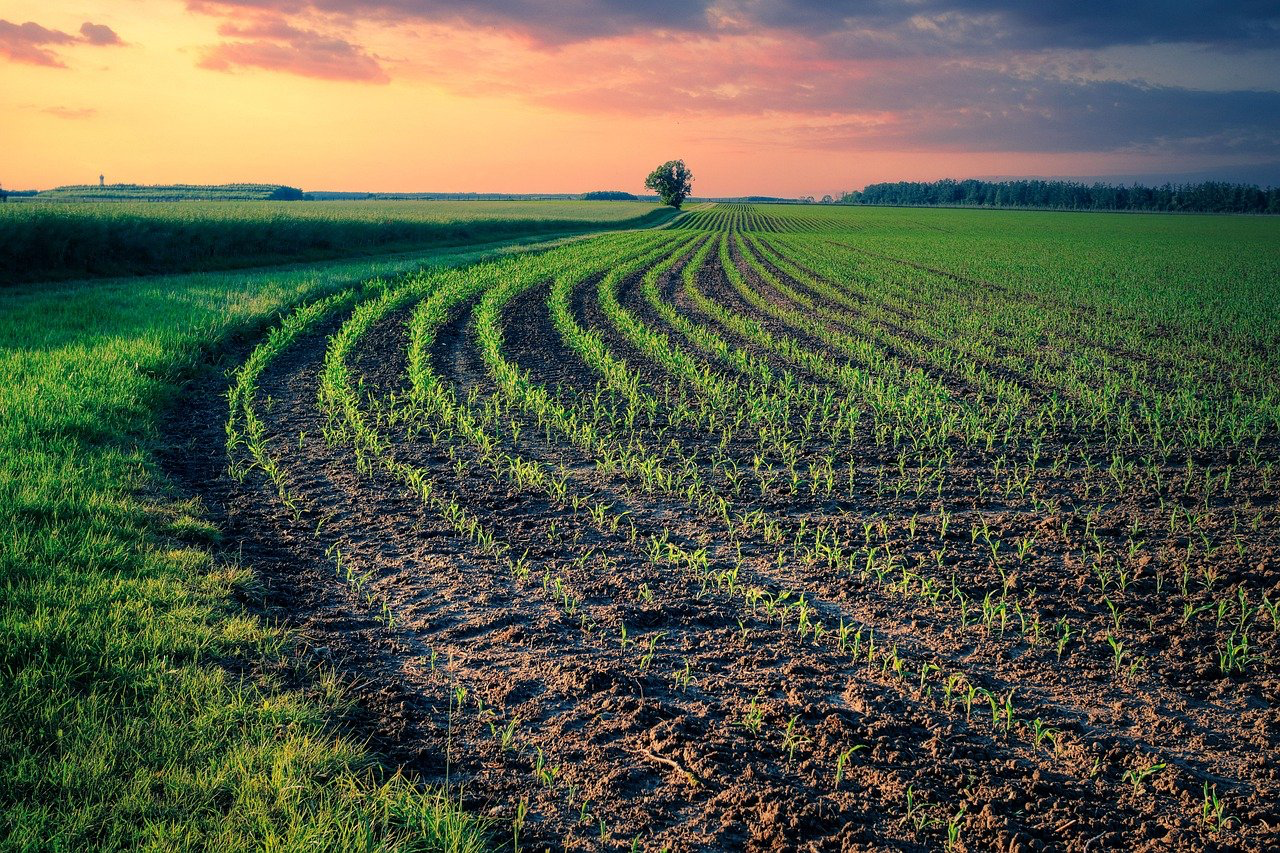

### Importing the Libraries

In [1]:
# for manipulations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

import ipywidgets
from ipywidgets import interact

### Reading the Dataset

In [2]:
# lets read the dataset
data = pd.read_excel('data.xlsx')
df = data.copy()
# lets check teh shape of the dataset
print("Shape of the Dataset :", data.shape)

Shape of the Dataset : (2200, 8)


In [3]:
# lets check the head of the dataset
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

<div class="alert alert-block alert-warning ">
    
## Description for each of the columns in the Dataset

- N - ratio of Nitrogen content in soil
    
- P - ratio of Phosphorous content in soil
    
- K - ration of Potassium content in soil
    
- temperature - temperature in degree Celsius
    
- humidity - relative humidity in %
    
- ph - ph value of the soil
    
- rainfall - rainfall in mm
    

In [4]:
# lets check if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
# lets check the Crops present in this Dataset
data['label'].value_counts()

chickpea       100
cotton         100
lentil         100
mungbean       100
orange         100
pigeonpeas     100
coconut        100
blackgram      100
mango          100
watermelon     100
papaya         100
mothbeans      100
coffee         100
maize          100
grapes         100
rice           100
apple          100
jute           100
banana         100
muskmelon      100
pomegranate    100
kidneybeans    100
Name: label, dtype: int64

### Descriptive Statistics

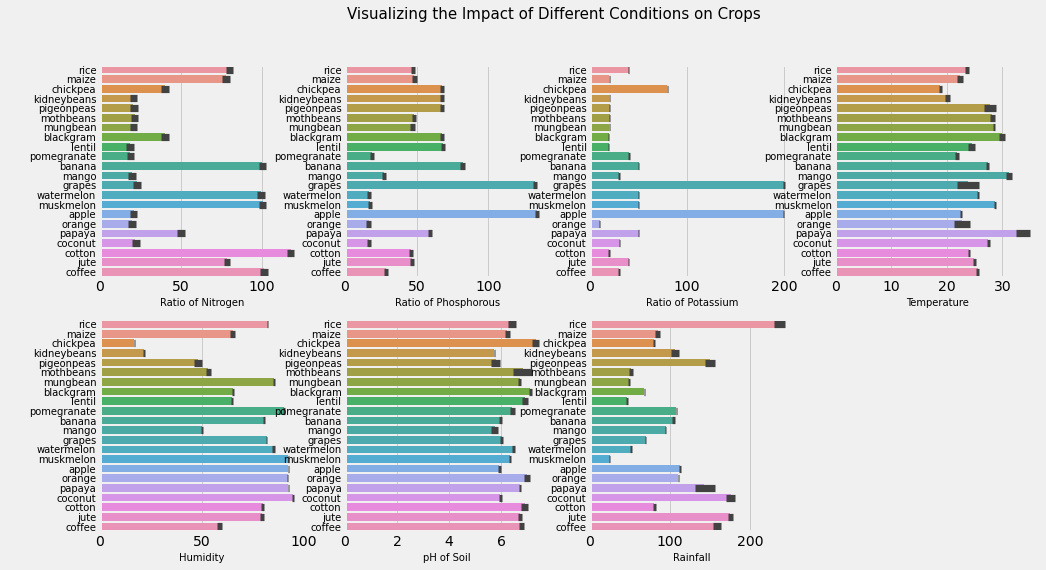

In [6]:
### Data Visualizations

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(data['N'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(data['P'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(data['K'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(data['temperature'], data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(data['humidity'], data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(data['ph'], data['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(data['rainfall'], data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

In [ ]:
data.describe()

In [11]:
# lets check the Summary Statistics for each of the Crops

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('chickpea', 'cotton', 'lentil', 'mungbean', 'oran…

In [14]:
## Lets compare the Average Requirement for each crops with average conditions

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[data['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[data['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[data['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[data['label'] == 'cotton'][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[data['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [15]:
# lets make this funtion more Intuitive

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

### Analyzing Agricultural Conditions

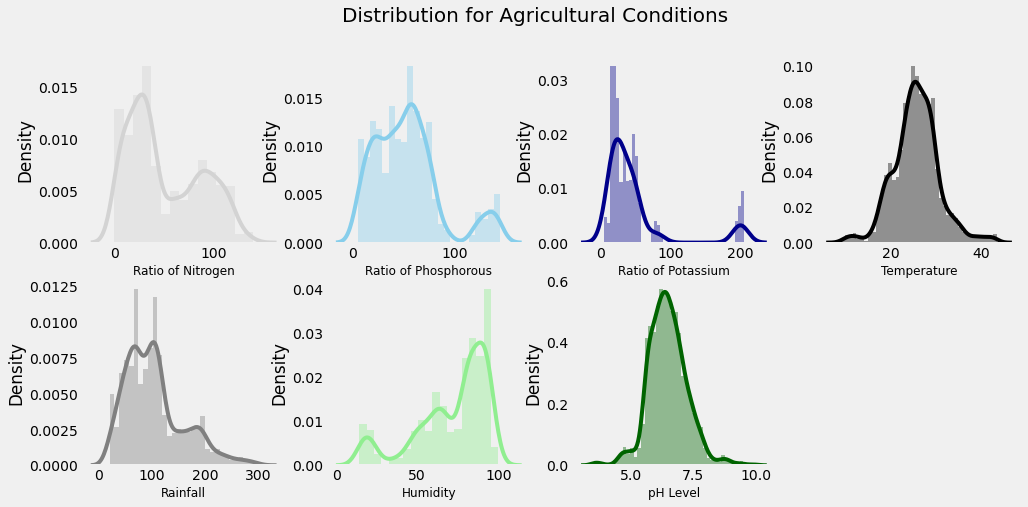

In [16]:
### Lets check the distribution of Agricultural Conditions

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(data['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['K'], color ='darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()


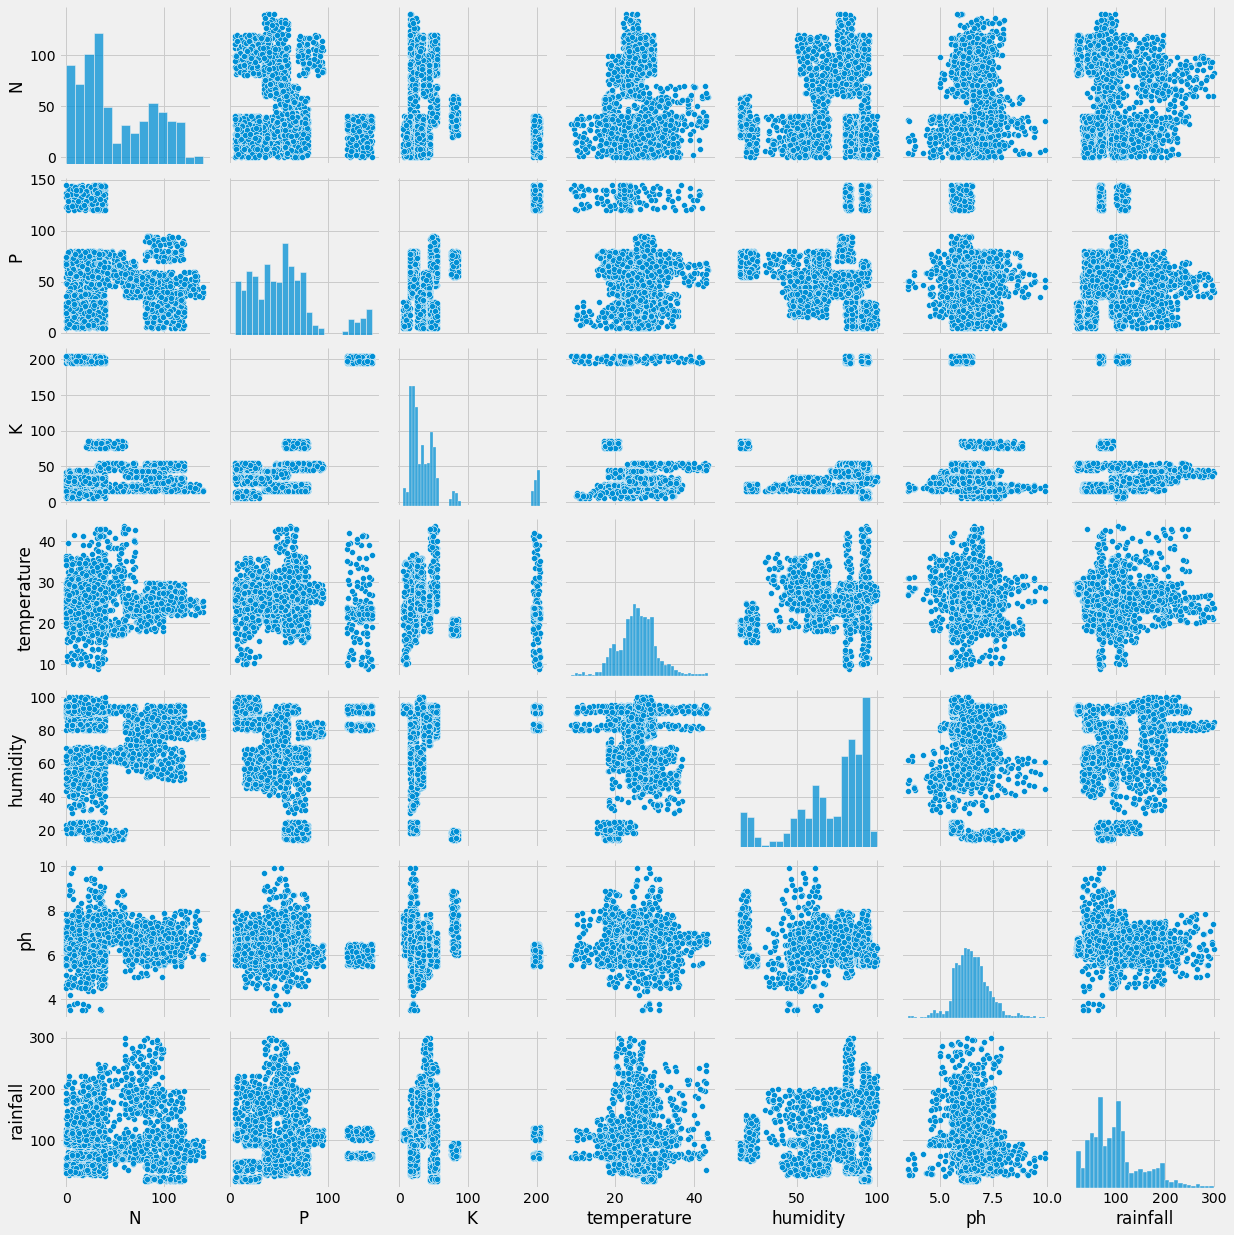

In [17]:
sns.pairplot(df)

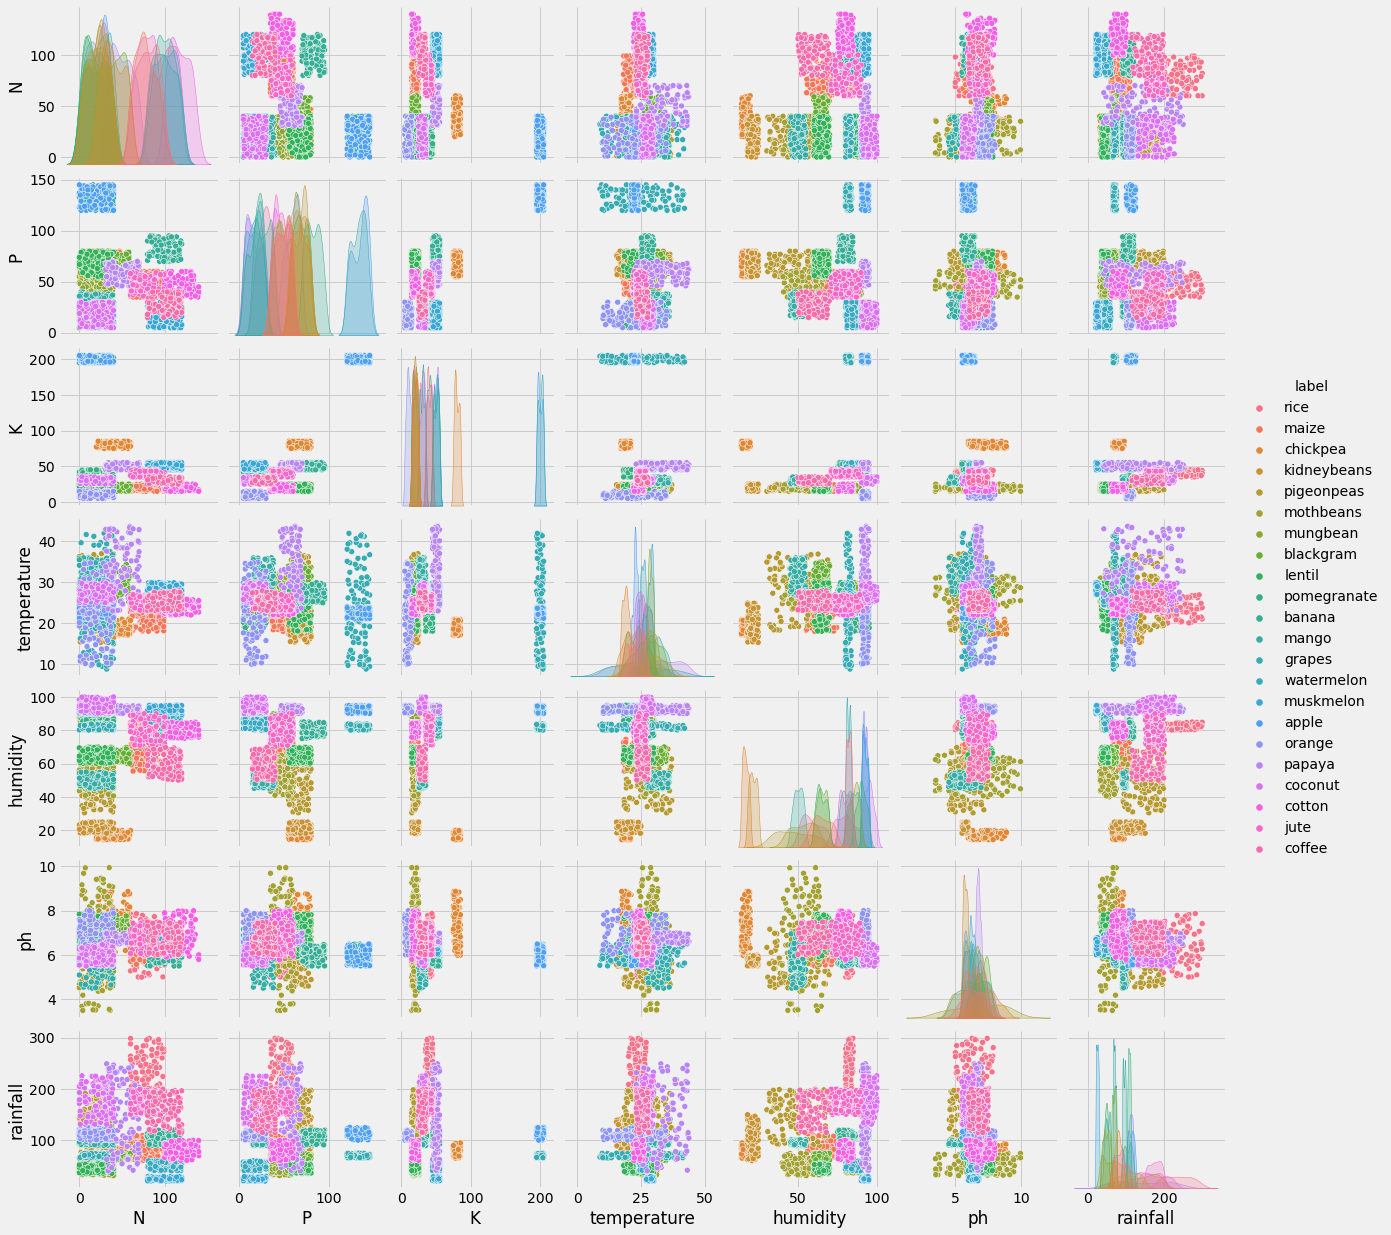

In [18]:
sns.pairplot(data= df, hue = 'label')

In [19]:
## Lets find out some Interesting Facts

print("Some Interesting Patterns")
print("---------------------------------")
print("Crops which requires very first group Ratio of Nitrogen Content in Soil:", data[data['N'] <50]['label'].unique())
print("Crops which requires very second group of Nitrogen Content in Soil:", data[data['N'] >50]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature :", data[data['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
---------------------------------
Crops which requires very first group Ratio of Nitrogen Content in Soil: ['chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'pomegranate' 'mango' 'grapes' 'apple' 'orange' 'papaya'
 'coconut']
Crops which requires very second group of Nitrogen Content in Soil: ['rice' 'maize' 'chickpea' 'blackgram' 'banana' 'watermelon' 'muskmelon'
 'papaya' 'cotton' 'jute' 'coffee']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


In [20]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


<AxesSubplot:>

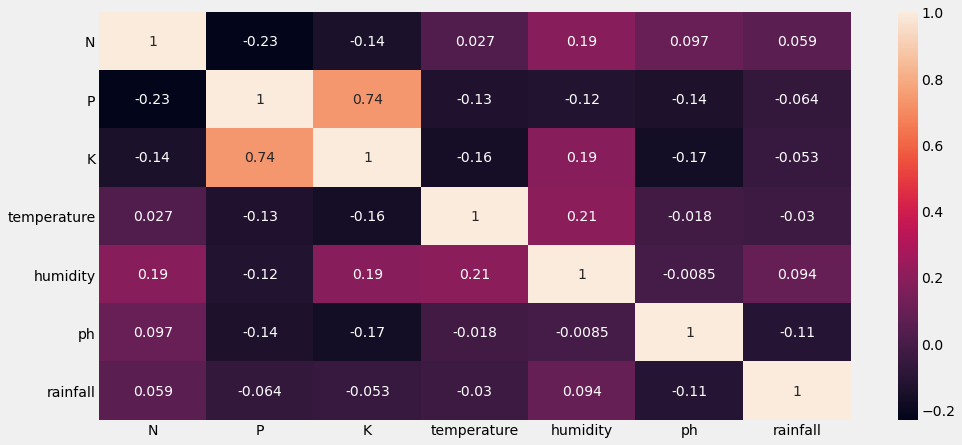

In [21]:
sns.heatmap(df.corr(), annot = True)

### Clustering Similar Crops

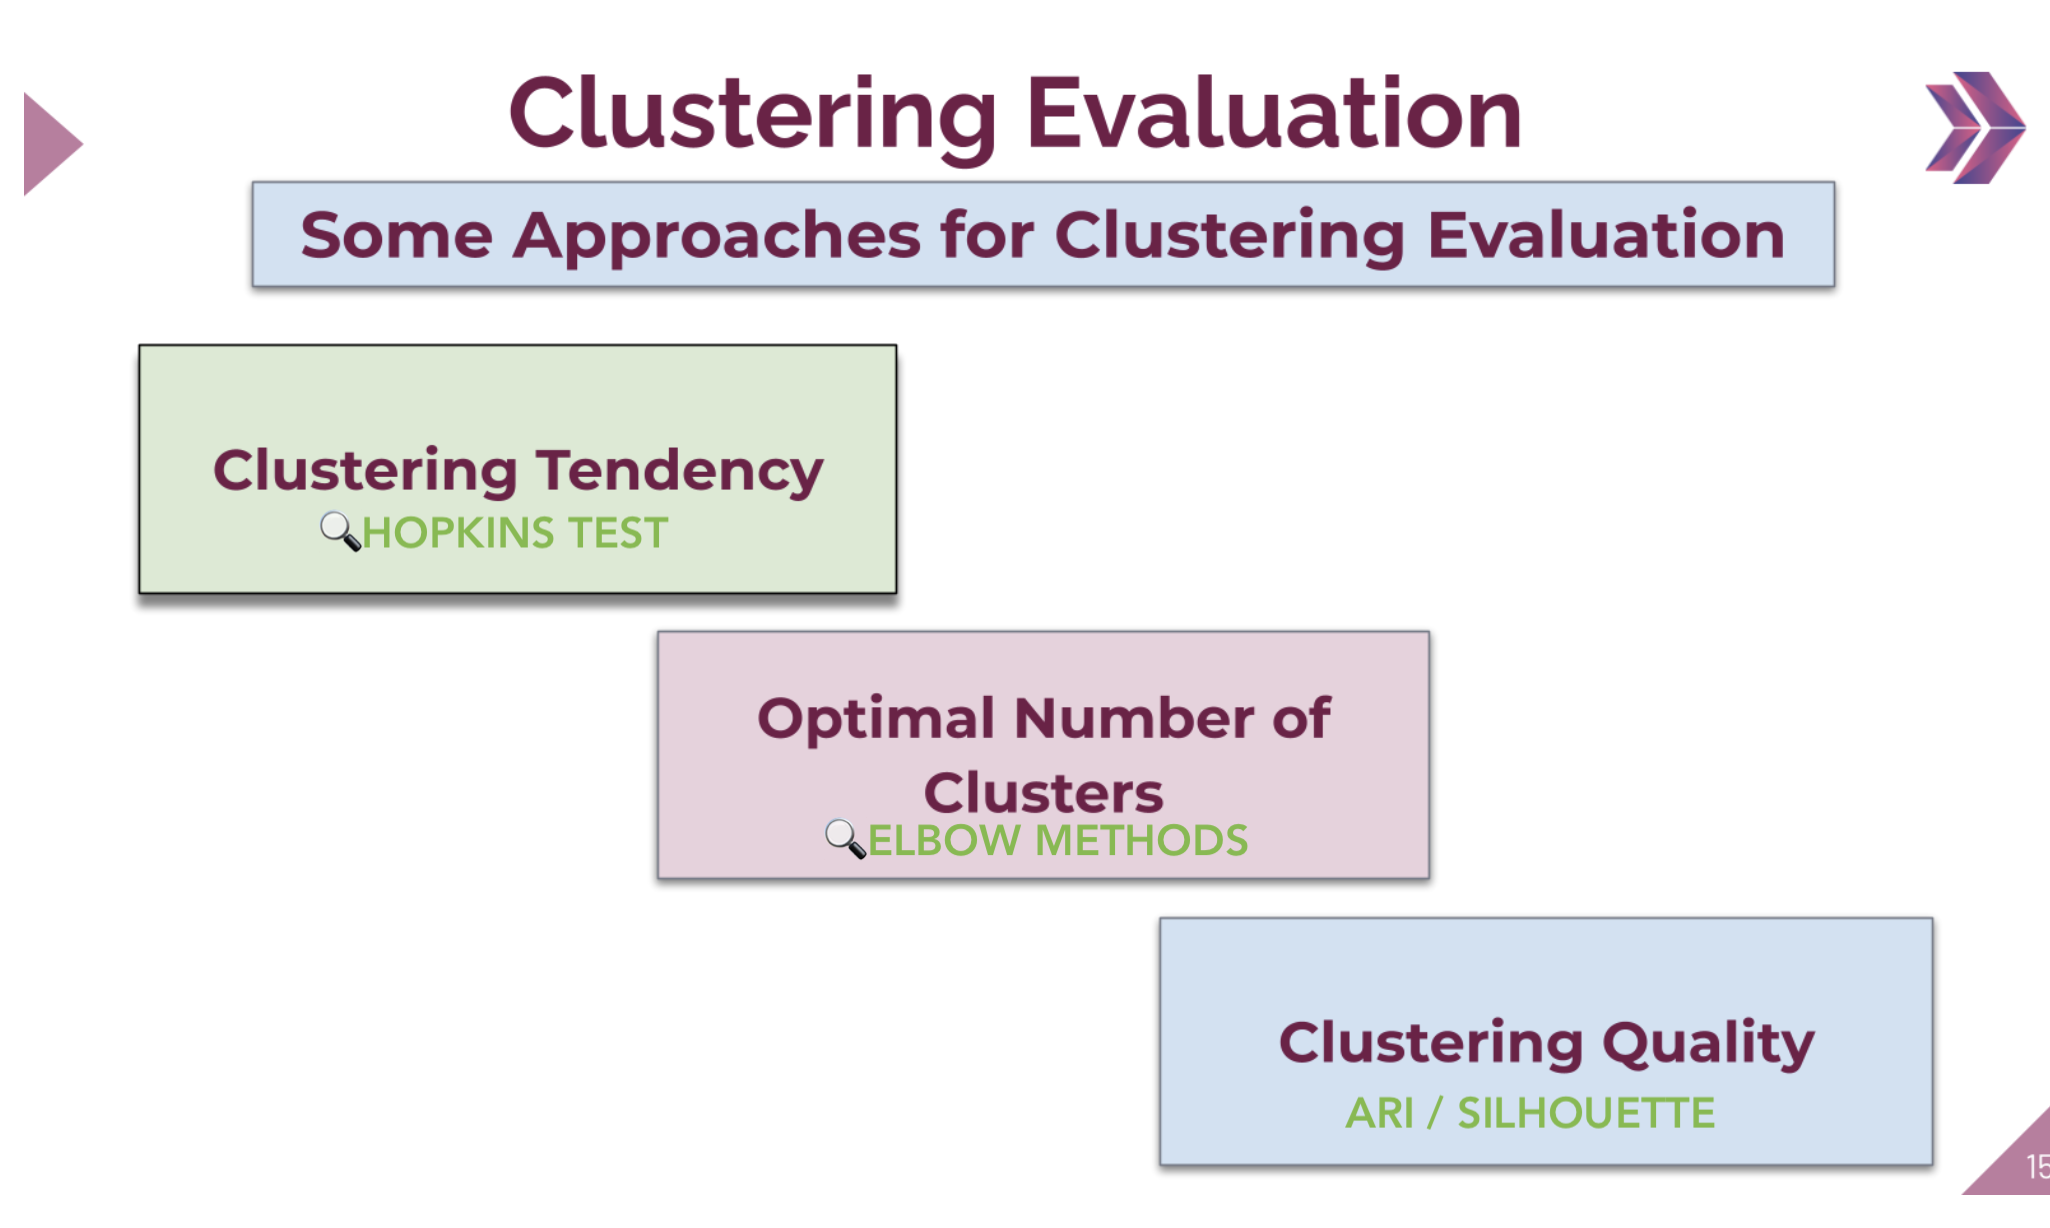

## Hopkins test

In [22]:
### Lets try to Cluster these Crops
# lets import the warnings library so that we can avoid warnings

import warnings
warnings.filterwarnings('ignore')

from pyclustertend import hopkins
from sklearn.preprocessing import StandardScaler


# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values

# let's check the shape of x
print(x.shape)


# lets convert this data into a dataframe
x_data  = pd.DataFrame(x)
x_data.head()

scaler = StandardScaler()
x = scaler.fit_transform(x_data)
print('hopkins', hopkins(x, x.shape[0]))

(2200, 7)
hopkins 0.1293711540796066


# Choosing The Optimal Number of Clusters

## Elbow metod

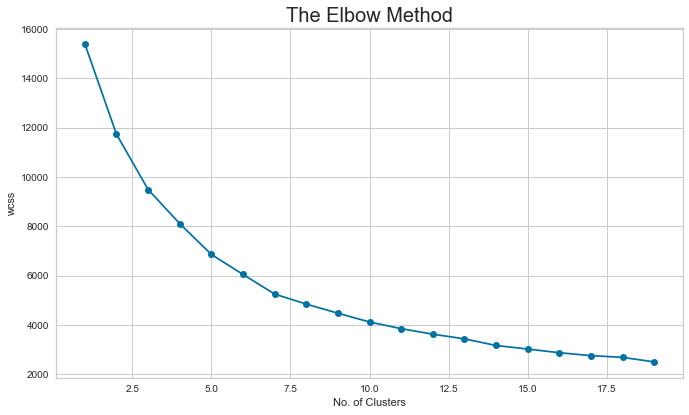

In [51]:
# lets determine the Optimum Number of Clusters within the Dataset

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 6)

wcss = []
for i in range(1, 20):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    km.fit(x)
    wcss.append(km.inertia_)   # herbir gozlemin centroidlerine gore mesafesini alip karalerini alip topluy0r, ssd icine atiyor.

# lets plot the results
plt.plot(range(1, 20), wcss, 'bo-')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [53]:
wcss

[15399.999999999989,
 11738.011335751866,
 9489.46204297315,
 8105.869318397221,
 6856.22519873989,
 6045.099594574801,
 5248.625716446028,
 4842.083075442203,
 4472.479144098601,
 4115.532756294272,
 3845.225493186063,
 3621.5385001825725,
 3432.072080981571,
 3162.3678555594834,
 3019.307055047916,
 2868.499056440703,
 2751.6346108928497,
 2681.3459331599333,
 2497.349813563464]

In [54]:
pd.Series(wcss).diff()
df_diff =pd.DataFrame(-pd.Series(wcss).diff()).rename(index = lambda x : x+1)
df_diff


0
1           NaN
2   3661.988664
3   2248.549293
4   1383.592725
5   1249.644120
6    811.125604
7    796.473878
8    406.542641
9    369.603931
10   356.946388
11   270.307263
12   223.686993
13   189.466419
14   269.704225
15   143.060801
16   150.807999
17   116.864446
18    70.288678
19   183.996120

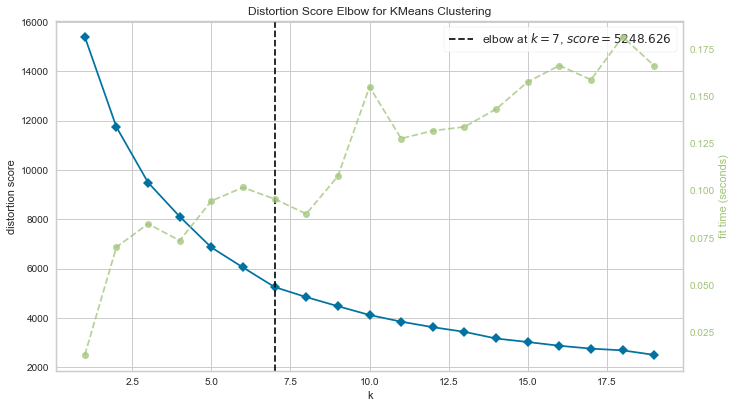

In [55]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(1,20))

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [56]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
    

For n_clusters=2, the silhouette score is 0.4168458131187344
For n_clusters=3, the silhouette score is 0.2518637956538091
For n_clusters=4, the silhouette score is 0.25526916389002857
For n_clusters=5, the silhouette score is 0.29242902476633836
For n_clusters=6, the silhouette score is 0.3043864620719614
For n_clusters=7, the silhouette score is 0.33325187607234735
For n_clusters=8, the silhouette score is 0.3265725788326683


In [30]:
#lets implement the K Means algorithm to perform Clustering analysis

km = KMeans(n_clusters = 7)
y_means = km.fit_predict(x)

# lets find out the Results
a = data['label']
data['predicted_label'] = y_means

# lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")

print("Crops in First Cluster:", data[data['predicted_label'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", data[data['predicted_label'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", data[data['predicted_label'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Forth Cluster:", data[data['predicted_label'] == 3]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Fifth Cluster:", data[data['predicted_label'] == 4]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Sixth Cluster:", data[data['predicted_label'] == 5]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Seventh Cluster:", data[data['predicted_label'] == 6]['label'].unique())


Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------
Crops in Second Cluster: ['maize' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil' 'mango'
 'orange' 'papaya']
---------------------------------------------------------------
Crops in Third Cluster: ['pigeonpeas' 'pomegranate' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Crops in Forth Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'lentil']
---------------------------------------------------------------
Crops in Fifth Cluster: ['grapes' 'apple']
---------------------------------------------------------------
Crops in Sixth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------
Crops in Seventh Cluster: ['pigeonpeas' 'mot

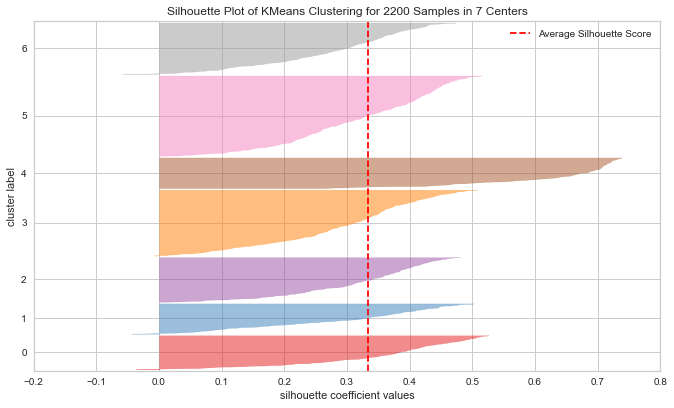

In [57]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=7, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(x)    # Fit the data to the visualizer
visualizer.poof();

In [32]:
clus_pred = data.iloc[:, [0, 1, 2, 3, 4, 5, 6,8]].groupby("predicted_label").mean().T
clus_pred

predicted_label          0          1           2          3           4  \
N                99.204198  28.153488   20.048110  29.518018   21.990000   
P                42.055344  56.976744   17.920962  67.617117  133.375000   
K                38.057252  22.567442   27.766323  47.036036  200.000000   
temperature      25.663235  28.904633   23.659163  19.527767   23.240259   
humidity         80.026258  70.685337   92.291528  22.072149   87.104305   
ph                6.416158   7.108328    6.441982   6.502897    5.977800   
rainfall         71.166221  61.908484  131.458755  96.499741   91.133304   

predicted_label           5           6  
N                 78.591045   20.262626  
P                 44.602985   45.545455  
K                 38.534328   24.500000  
temperature       25.987811   29.824545  
humidity          77.208122   49.944578  
ph                 6.650851    5.415925  
rainfall         195.380596  102.786330

<AxesSubplot:>

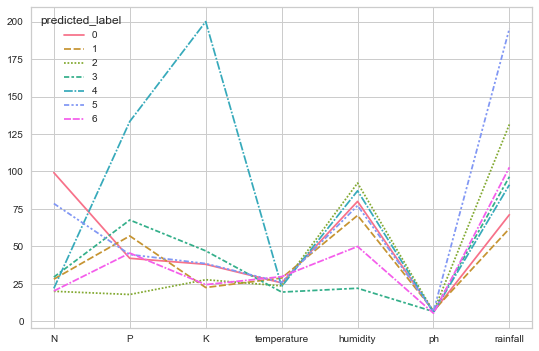

In [33]:
sns.lineplot(data = clus_pred)

# Hierarchical

📌K-MEANS ILE Hierarchial arasindaki en buyuk fark; k-meansde cluster sayilarini modeli olusturduktan sonra deneyerek uygun olani seciyoruz puanlar alaiyorduk, , ama bunda boyle birsey yapmayacagiz,  bu nu yapmamazi saglayan sey dendrogram .bu grafiktan hangi cluster sayisini yorumlayacagiz.

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [36]:
hc_ward = linkage(y = x, method = "ward")
hc_complete = linkage(x, "complete")
hc_average = linkage(x, "average")
hc_single = linkage(x, "single")

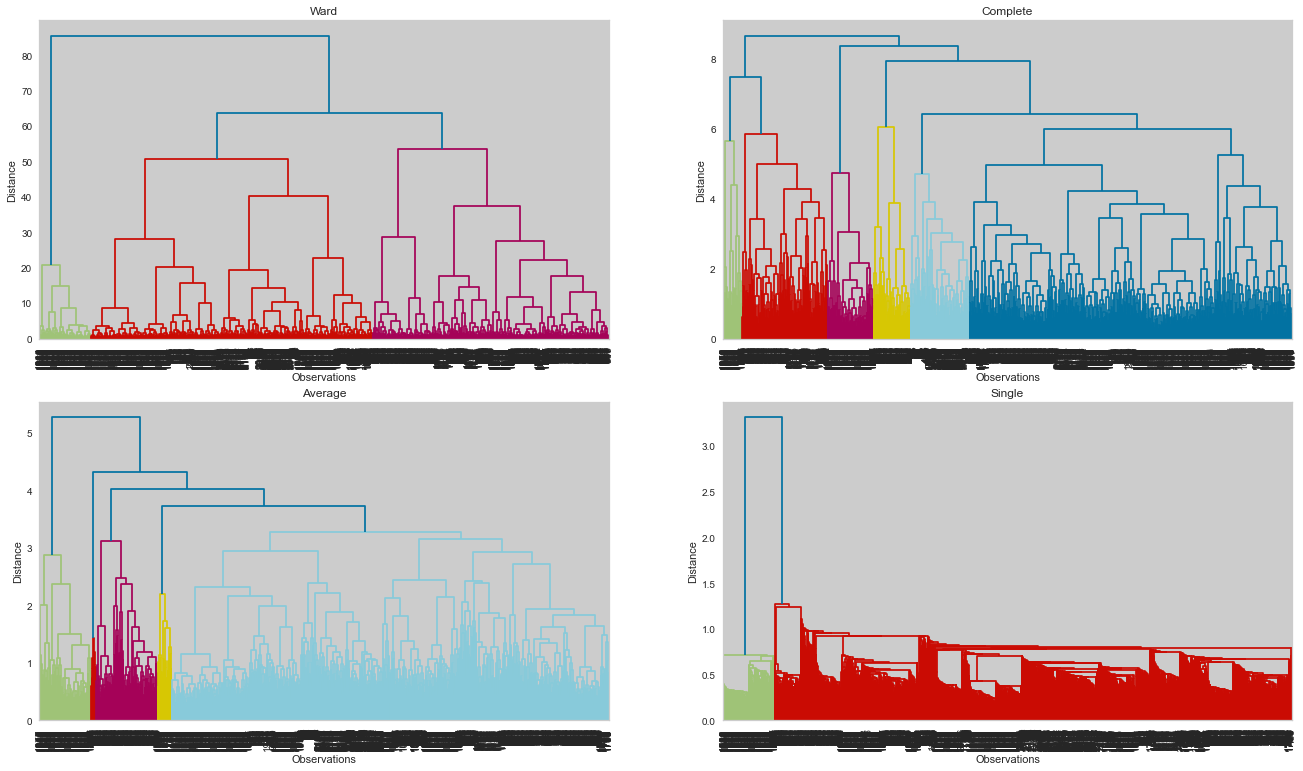

In [37]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, p=10);

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
K = range(2,20)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(x)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(x, model.labels_)}')

Silhouette Score for 2 clusters: 0.4168458131187344
Silhouette Score for 3 clusters: 0.23869493754944734
Silhouette Score for 4 clusters: 0.2592304693088373
Silhouette Score for 5 clusters: 0.2820258490803883
Silhouette Score for 6 clusters: 0.30378863999108935
Silhouette Score for 7 clusters: 0.31690653281999875
Silhouette Score for 8 clusters: 0.322167337843132
Silhouette Score for 9 clusters: 0.3214509775775475
Silhouette Score for 10 clusters: 0.3337244226886863
Silhouette Score for 11 clusters: 0.3305129848866782
Silhouette Score for 12 clusters: 0.3247281608508889
Silhouette Score for 13 clusters: 0.3197040718519582
Silhouette Score for 14 clusters: 0.3290482998664644
Silhouette Score for 15 clusters: 0.33095277810905444
Silhouette Score for 16 clusters: 0.330269775045346
Silhouette Score for 17 clusters: 0.33207490806092954
Silhouette Score for 18 clusters: 0.3381047368153902
Silhouette Score for 19 clusters: 0.32709610392148364


In [42]:
model = AgglomerativeClustering(n_clusters=7, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(x)

In [43]:
data["predicted_clusters_hr"] = clusters

In [44]:
data.predicted_clusters_hr.value_counts()

1    501
4    451
5    322
2    266
6    232
0    228
3    200
Name: predicted_clusters_hr, dtype: int64

In [45]:
print("Lets check the Results After Applying the Hierarcihal Clustering Analysis \n")
print("Crops in First Cluster:", data[data['predicted_clusters_hr'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", data[data['predicted_clusters_hr'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", data[data['predicted_clusters_hr'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Forth Cluster:", data[data['predicted_clusters_hr'] == 3]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Fifth Cluster:", data[data['predicted_clusters_hr'] == 4]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Sixth Cluster:", data[data['predicted_clusters_hr'] == 5]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Seventh Cluster:", data[data['predicted_clusters_hr'] == 6]['label'].unique())

Lets check the Results After Applying the Hierarcihal Clustering Analysis 

Crops in First Cluster: ['chickpea' 'kidneybeans' 'pigeonpeas']
---------------------------------------------------------------
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'cotton' 'coffee']
---------------------------------------------------------------
Crops in Third Cluster: ['pomegranate' 'orange' 'coconut']
---------------------------------------------------------------
Crops in Forth Cluster: ['grapes' 'apple']
---------------------------------------------------------------
Crops in Fifth Cluster: ['mothbeans' 'mungbean' 'blackgram' 'lentil' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Crops in Sixth Cluster: ['rice' 'papaya' 'jute' 'coffee']
---------------------------------------------------------------
Crops in Seventh Cluster: ['pigeonpeas' 'mothbeans' 'lentil' 'mango']


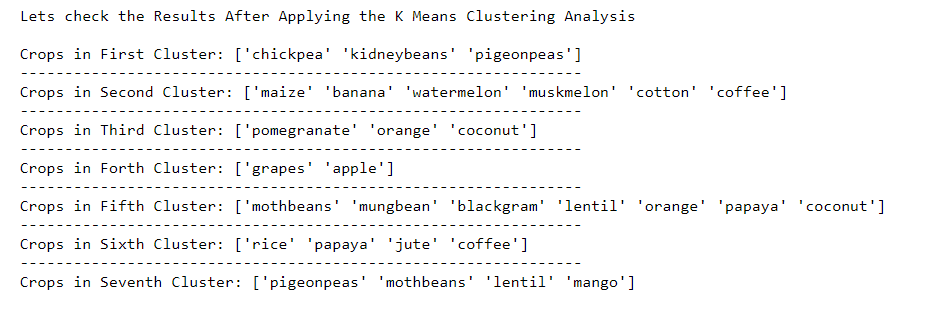

In [46]:
data.head()

N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   predicted_label  predicted_clusters_hr  
0                5                      5  
1                5                      5  
2                5                      5  
3                5                      5  
4                5                      5

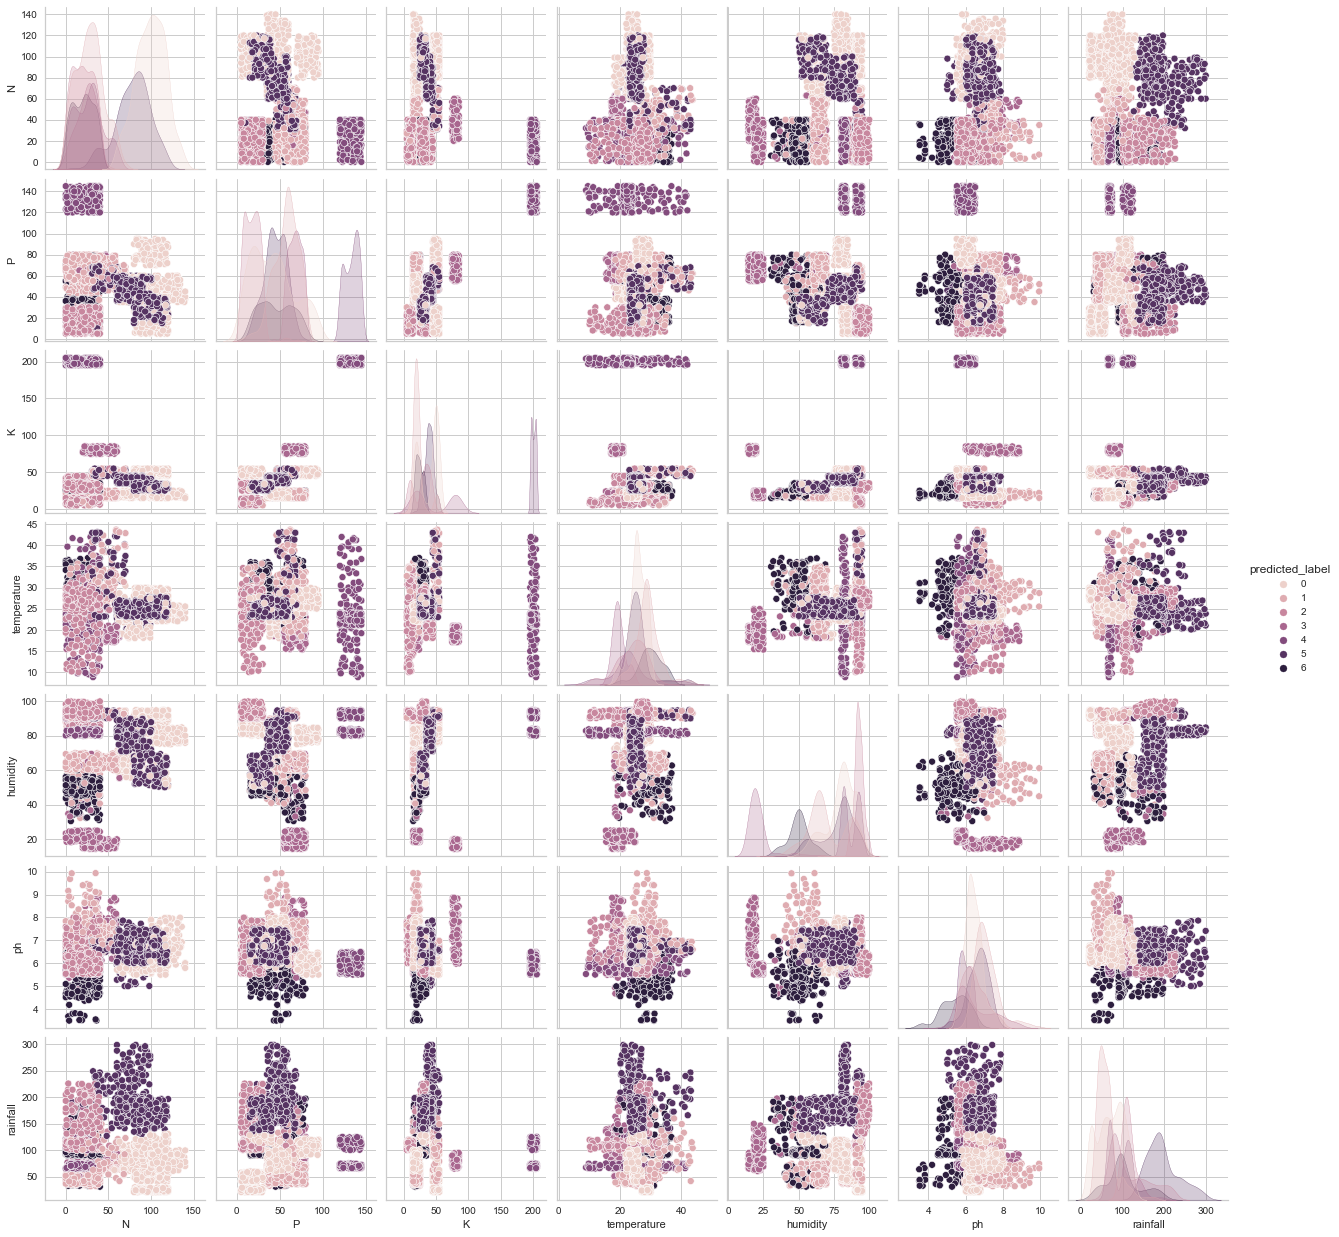

In [47]:
sns.pairplot(data = data.drop('predicted_clusters_hr', axis = 1), hue = 'predicted_label')

In [50]:
data.label.value_counts().index

Index(['chickpea', 'cotton', 'lentil', 'mungbean', 'orange', 'pigeonpeas',
       'coconut', 'blackgram', 'mango', 'watermelon', 'papaya', 'mothbeans',
       'coffee', 'maize', 'grapes', 'rice', 'apple', 'jute', 'banana',
       'muskmelon', 'pomegranate', 'kidneybeans'],
      dtype='object')